   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


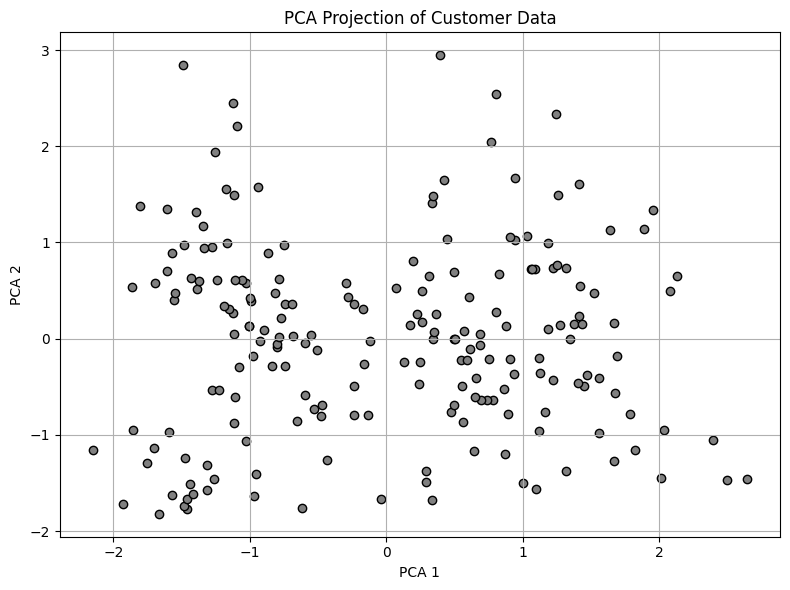

In [1]:
#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#  Load dataset
df = pd.read_csv("../Data/Mall_Customers.csv")

#  View top records
print(df.head())

#  Drop non-numeric columns for clustering (like CustomerID, Gender)
df_clean = df.drop(['CustomerID', 'Gender'], axis=1)

#  Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

#  Optional: Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#  Visualize PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='gray', edgecolor='k')
plt.title("PCA Projection of Customer Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/pca_projection.png")
plt.show()


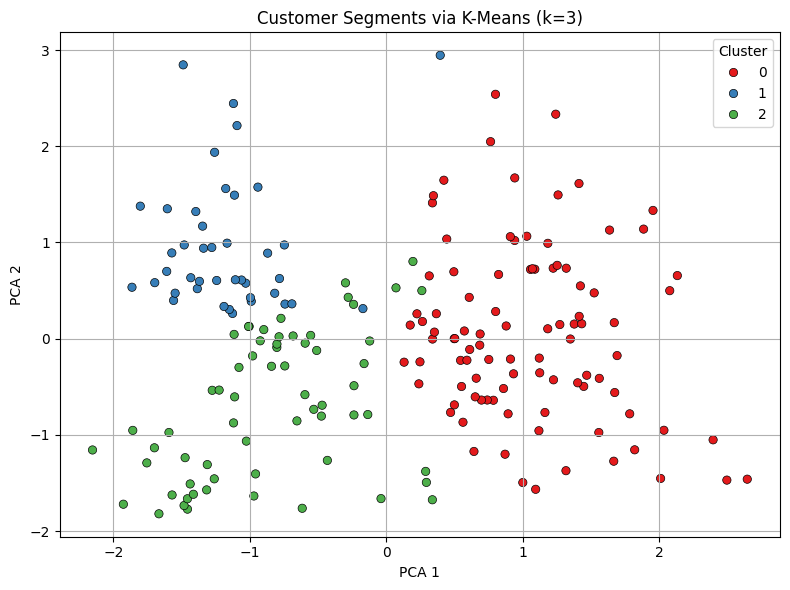

In [2]:
from sklearn.cluster import KMeans

#  Try an initial k (e.g., 3) just to see clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

#  Assign cluster labels
df['Cluster'] = kmeans.labels_

#  Visualize clusters on PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set1', edgecolor='k')
plt.title("Customer Segments via K-Means (k=3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/cluster_k3.png")
plt.show()


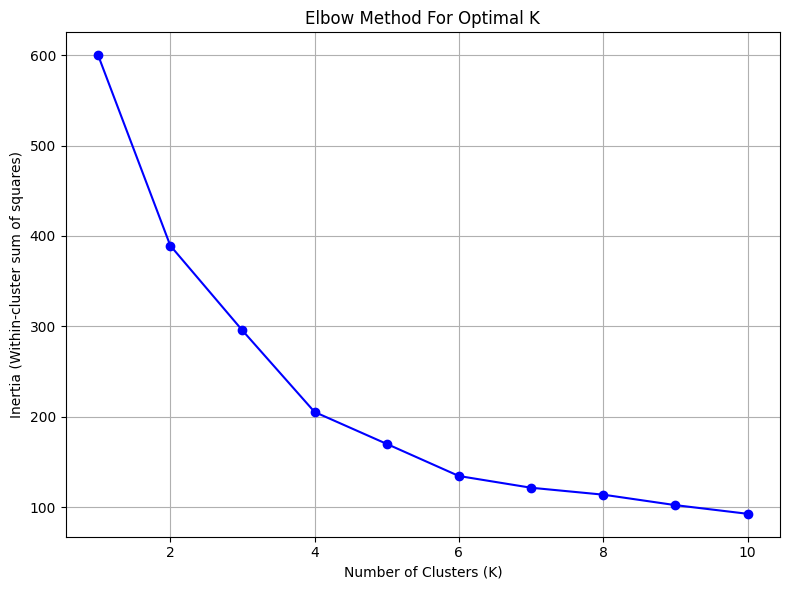

In [3]:
#  Use Elbow Method to choose best K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

#  Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method For Optimal K")
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/elbow_plot.png")
plt.show()


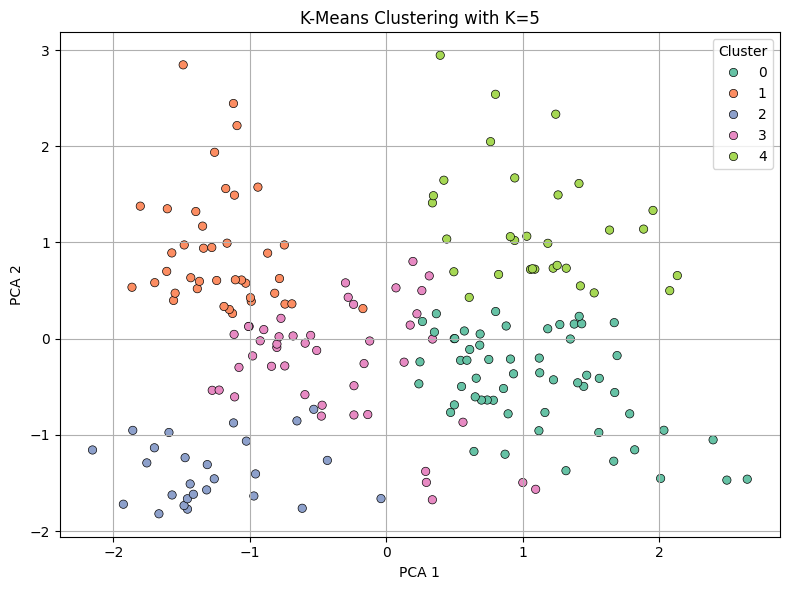

In [4]:
#  Fit final KMeans model with optimal K (e.g., 5)
optimal_k = 5  # Change this if elbow suggested a different value
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(scaled_data)

#  Update cluster labels
df['Cluster'] = kmeans_final.labels_

#  Plot final clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set2', edgecolor='k')
plt.title(f"K-Means Clustering with K={optimal_k}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"../output/cluster_k{optimal_k}.png")
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

#  Compute silhouette score
score = silhouette_score(scaled_data, df['Cluster'])

print(f" Silhouette Score for K={optimal_k}: {score:.4f}")


 Silhouette Score for K=5: 0.4085
